# Note: in order to visualize Feynman Diagrams, we use the python package pyx, which relies upon $\LaTeX$, in particular the texlive-fonts-recommended and dvipng packages. 

# A $\LaTeX$ distribution is NOT required to use the DiagramGenerator. In order to use this notebook, which focuses on visualization, you must have a $\LaTeX$ distribution.  

# To use this notebook with Google Colab, we have found that the two commands in the following cell are necessary. Installing these two tex packages will take about a minute

In [1]:
!apt-get install texlive-fonts-recommended
!apt-get install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-texgyre
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libkpathsea6 libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2
  libzzip-0-13 lmodern poppler-data t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base tipa
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer
  texlive-fonts-recommended-doc texlive-latex-base-doc
The following NEW packages will be installed:
  f

# Setting up the notebook

In [2]:
%matplotlib notebook

In [3]:
!pip install ufss

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 2.6MB 8.8MB/s 
     |████████████████████████████████| 2.6MB 38.8MB/s 
  Created wheel for pyx: filename=PyX-0.15-cp36-none-any.whl size=434894 sha256=391e59bd7cc8613ed021f420ec8a59522a2b03d170655dbcc78dc46a75c6b517
  Stored in directory: /root/.cache/pip/wheels/2a/75/30/cc5cc36ea2b0ae1e45fa29e55174093505547457196e34e1a8
Successfully built pyx


In [4]:
import numpy as np
import ufss
import os

# Using the Diagram Generator

In [5]:
# DiagramGenerator class, or DG for short
DG = ufss.DiagramGenerator

This notebook begins with an example of using the Diagram Generator to generate diagrams for optical nonlinear spectroscopy using the 2D photon echo as an example.  We then move on to the fluorescence-detected analogue of 2D photon echo as a counter-point.  Following that are further examples.  A list of all examples included in this notebook follows, in order of appearance:
1. Tranditional 2D photon echo (2DPE)
2. Fluorescence-detected 2DPE (or any action detection method)
3. Transient Absoroption (TA)
4. 5th-order correction to TA in the pump amplitude
5. 5th-order correction to TA in the probe amplitude
6. Exciton-exciton interaction 2D spectroscopy
7. 2DPE for IR vibrational spectroscopy

# 1. 2DPE

## Generic case

In [6]:
# initialize the module
tdpe = DG()

In [7]:
# DiagramAutomation needs to know the phase-matching/-cycling condition
# 2DPE example
tdpe.set_phase_discrimination([(0,1),(1,0),(1,0)])
# Set the pulse durations
t0 = np.linspace(-1,1,num=11)
t1 = np.linspace(-2,2,num=21)
t2 = np.linspace(-2,2,num=11)
tlo = np.linspace(-3,3,num=31)
# set the pulse durations of each pulse
# the local oscillator does not impact diagram generation, but is still required at this time
tdpe.efield_times = [t0,t1,t2,tlo]

In [8]:
# using a list of pulse arrival times, we can generate the diagrams that contribute for 
# that set of arrival times
# note the arrival time of the local oscillator is irrelevant, but needed by the code at this time
# here we choose for the local oscillator to "arrive" simulltaneously with the 3rd pulse
time_ordered_diagrams = tdpe.get_diagrams([0,100,200,200])
time_ordered_diagrams

[(('Bu', 0), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bd', 1), ('Ku', 2))]

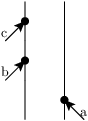

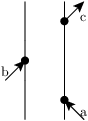

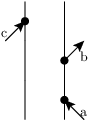

In [9]:
#display the diagrams for visual inspection (takes a few seconds to render)
tdpe.display_diagrams(time_ordered_diagrams)

In [10]:
all_diagrams = tdpe.get_diagrams([0,1,2,2])
print('There are ',len(all_diagrams),' diagrams in total')

There are  16  diagrams in total


In [11]:
# Check in this folder after running this cell to see 16 individual diagrams saved as pdf files
tdpe_diagrams_folder = 'TDPE_all_diagrams'
os.makedirs(tdpe_diagrams_folder,exist_ok=True)

# rendering and saving the diagrams takes a few seconds
tdpe.save_diagrams(all_diagrams,folder_name=tdpe_diagrams_folder)

To play with different cases where only some of the pulses overlap, uncomment and execute any of the following:

In [12]:
#ab_overlap = tdpe.get_diagrams([0,1,6,6])
#bc_overlap = tdpe.get_diagrams([0,4,6,6])
#ab_bc_overlap = tdpe.get_diagrams([0,3,6,6])

And uncomment the following for the case you want to see

In [13]:
#tdpe.display_diagrams(ab_overlap) #<--- change the argument of display diagrams to the case you have uncommented and executed

## Time-ordered example for only one electronic excited state

If the system under study has only one excited electronic state, then the excited-state absoroption process cannot take place.  This is captured by setting the attribute 'maximum_manifold' (default value $\infty$) as follows

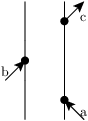

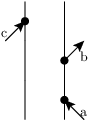

In [14]:
tdpe.maximum_manifold = 1
time_ordered_diagrams = tdpe.get_diagrams([0,100,200,200])
tdpe.display_diagrams(time_ordered_diagrams)

Note that even for the case of a single electronic excitation, if there is a significant electronic relaxation rate, 'maximum_manifold' should not be set to 1, but left at the default value $\infty$

# 2. Action-detected 2DPE

In [15]:
tdfs = DG(detection_type='fluorescence')

tdfs.set_phase_discrimination([(0,1),(1,0),(1,0),(0,1)])

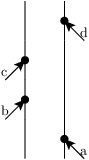

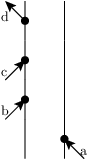

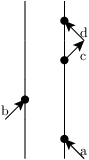

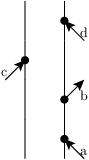

In [16]:
t3 = np.linspace(-2.5,2.5,num=25)
tdfs.efield_times = [t0,t1,t2,t3]
time_ordered_diagrams = tdfs.get_diagrams([0,100,200,300])
tdfs.display_diagrams(time_ordered_diagrams)

In [24]:
# and all possibly relevant diagrams can be generated by setting the pulse delays so that all pulses overlap
all_diagrams = tdfs.get_diagrams([0,1,2,2])
print('There are ',len(all_diagrams),' diagrams in total')

There are  88  diagrams in total


In [25]:
# Check in this folder to see all individual diagrams
tdfs_diagrams_folder = 'TDFS_all_diagrams'
os.makedirs(tdfs_diagrams_folder,exist_ok=True)
tdfs.save_diagrams(all_diagrams,folder_name=tdfs_diagrams_folder)

To play with different cases where only some of the pulses overlap, uncomment and execute any of the following:

In [ ]:
#ab_overlap = tdfs.get_diagrams([0,1,6,12])
#bc_overlap = tdfs.get_diagrams([0,5,5,12])
#cd_overlap = tdfs.get_diagrams([0,5,10,12])
#ab_bc_overlap = tdfs.get_diagrams([0,3,6,12])
#ab_cd_overlap = tdfs.get_diagrams([0,1,10,12])
# and so on

16

And uncomment the following for the case you want to see

In [ ]:
#tdfs.display_diagrams(ab_overlap) #<--- change the argument of display diagrams to the case you have uncommented and executed

# TA

In [18]:
ta = DG()
ta.set_phase_discrimination([(1,1),(1,0)])
pump_interval = t0
probe_interval = t1
ta.efield_times = [t0,t1]

# TA 5th-order corrections

## Higher order in pump amplitude

In [19]:
ta5order_pump = DG()
ta5order_pump.set_phase_discrimination([(2,2),(1,0)])
ta5order_pump.efield_times = [t0,t1]
# Time-ordered diagrams
ta5order_pump.get_diagrams([0,100,100])

[(('Ku', 0), ('Bu', 0), ('Ku', 0), ('Bu', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 0), ('Bu', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 0), ('Kd', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 0), ('Kd', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 0), ('Bu', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 0), ('Bu', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 0), ('Kd', 0), ('Ku', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 0), ('Bu', 0), ('Ku', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 0), ('Bu', 0), ('Bd', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 0), ('Kd', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Bu', 0), ('Ku', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Bu', 0), ('Ku', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bu', 0), ('Bd', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Bu', 0), ('Bd', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Kd', 0), ('Ku', 0), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Kd', 0), ('Ku', 0), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Kd', 0), ('Bd', 0), ('Ku', 1)),
 (('Ku', 0), (

## Higher order in probe amplitude

In [20]:
ta5order_probe = DG()
ta5order_probe.set_phase_discrimination([(1,1),(2,1)])
ta5order_probe.efield_times = [t0,t1]
ta5order_probe.get_diagrams([0,100,100])

[(('Ku', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bu', 1), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bu', 1), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Kd', 1), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Kd', 1), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Bu', 1), ('Ku', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Bu', 1), ('Bd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Kd', 1), ('Ku', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Bu', 1), ('Ku', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Bu', 1), ('Bd', 1)),
 (('Ku', 0), (

# EEI2D

In [21]:
eei2d = DG()
eei2d.set_phase_discrimination([(0,2),(2,0),(1,0)])
eei2d.efield_times = [t0,t1,t2,tlo]
eei2d.get_diagrams([0,100,200,300])

[(('Bu', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Bd', 1), ('Ku', 2))]

# 2DPE for IR vibrational spectroscopy

For IR vibrational spectroscopy, the 'maximum_manifold' should be set to the default of $\infty$.  In addition, the 'minimum_manifold' should be set to a negative number.  This is because, outside of zero temperature limit, the initial state of the system is a Boltzmann distribution of vibrational occupational states.  The $n=1$ vibrational state can be de-excited once, the $n=2$ vibrational state can be de-excited twice, and so on.  Depending on the ratio of $k_BT/\hbar\omega$, where $\omega$ is the vibrational frequency, the initial distribution will contain appreciable weight in the first $n$ vibrational ladder states.  This information should be used in setting 'minimum_manifold'.  Here are two examples

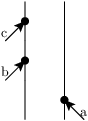

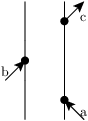

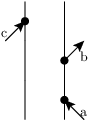

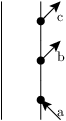

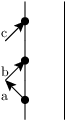

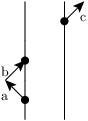

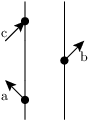

In [22]:
tdpe.maximum_manifold = np.inf
tdpe.minimum_manifold = -1
tdpe.display_diagrams(tdpe.get_diagrams([0,100,200,200]))

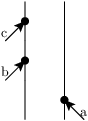

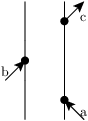

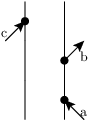

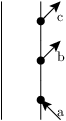

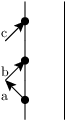

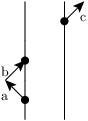

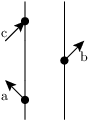

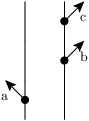

In [23]:
# or 
tdpe.maximum_manifold = np.inf
tdpe.minimum_manifold = -2
tdpe.display_diagrams(tdpe.get_diagrams([0,100,200,200]))

Going below minimum_manifold=-2 has no further effect on 2DPE, but one would need to consider smaller minimum_manifold values for higher-order spectroscopies.  To be safe, one can simply set minimum_manifold=-np.inf